# Brian Learning

## Import

In [28]:
from brian2 import *
%matplotlib inline
prefs.codegen.target = "numpy"

## Units

In [2]:
20*volt
1000*amp
1e6*volt
1000*namp
10*nA * 5*Mohm

50. * mvolt

## Simple Differential Equation

In [4]:
start_scope()
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
G = NeuronGroup(1, eqs, method='exact')
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))

Before v = 0.0
After v = 0.9999546000702376
Expected value of v = 0.9999546000702375


## Plotting

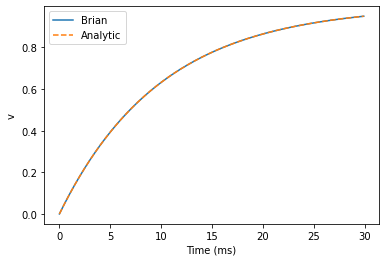

In [8]:
start_scope()
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)
run(30*ms)

plot(M.t/ms, M.v[0], 'C0', label='Brian')
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--', label='Analytic')
xlabel('Time (ms)')
ylabel('v')
legend();

## State Monitor

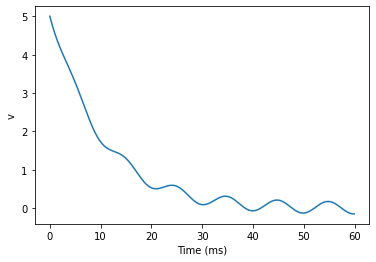

In [9]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1
'''

# Change to Euler method because exact integrator doesn't work here
G = NeuronGroup(1, eqs, method='euler')
M = StateMonitor(G, 'v', record=0)

# Initial value
G.v = 5

run(60*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

## Spikes and SpikeMonitor

Spike times: [16.  32.1 48.2] ms


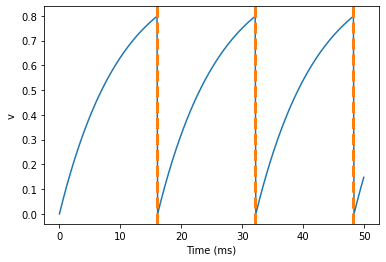

In [13]:
start_scope()

tau=10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='exact')

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(M.t/ms, M.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v')

print('Spike times: %s' % spikemon.t[:])

## Refactoriness

Unless refractory stops behavior until end of refractory period

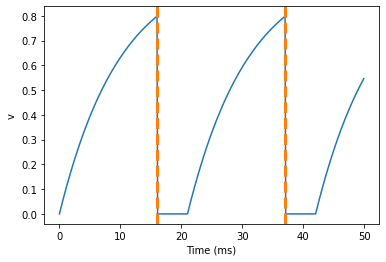

In [14]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(
    1,
    eqs,
    threshold='v>0.8',
    reset='v=0',
    refractory=5*ms,
    method='exact'
)

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

Removing "unless refractory" removes this behavior

spike times: [ 8. 23. 38.] ms


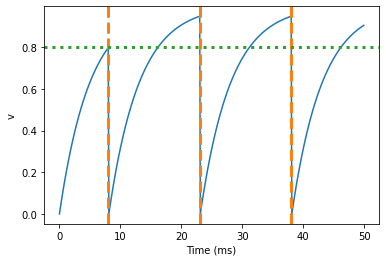

In [17]:
start_scope()

tau = 5*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(
    1,
    eqs,
    threshold='v>0.8',
    reset='v=0',
    refractory=15*ms,
    method='exact'
)

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
axhline(0.8, ls=':', c='C2', lw=3)
xlabel('Time (ms)')
ylabel('v')
print("spike times: %s" % spikemon.t[:])

## Multiple Neurons


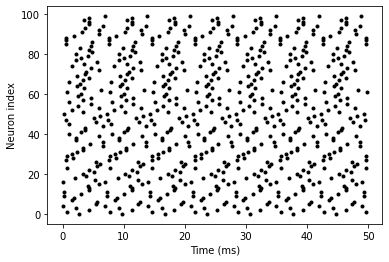

In [29]:
start_scope()

N = 100
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(
    N,
    eqs,
    threshold='v>1',
    reset='v=0',
    method='exact'
)
G.v = 'rand()'

spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');
# print("spike times: %s" % spikemon.t[:])

## Parameters


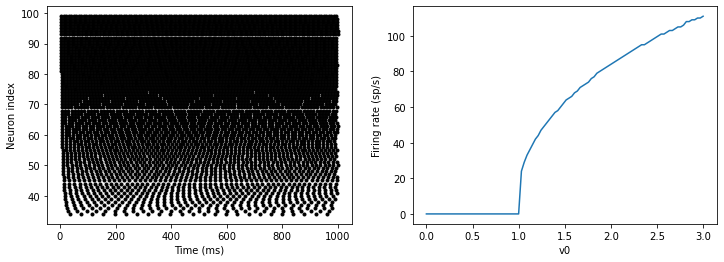

In [31]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms

eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(
    N,
    eqs,
    threshold='v>1',
    reset='v=0',
    refractory=5*ms,
    method='exact'
)
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12, 4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

## Stochastic Neurons


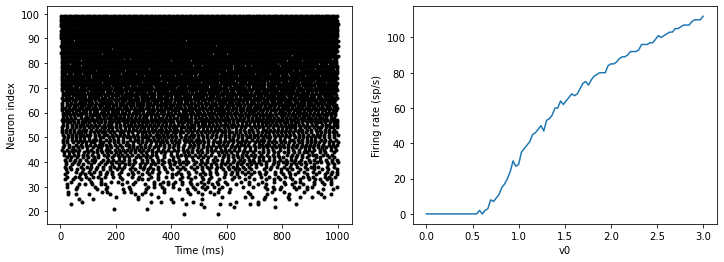

In [38]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau + sigma*xi*tau**(-0.5) : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(
    N,
    eqs,
    threshold='v>1',
    reset='v=0',
    refractory=5*ms,
    method='euler'
)
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

## End of Part 1


ValueError: weights should have the same shape as x

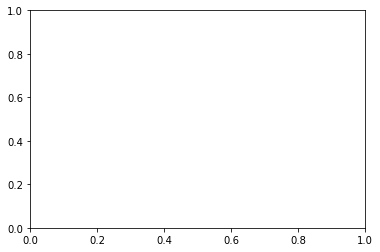

In [39]:
start_scope()

N = 1000
tau = 10*ms
vr = -70*mV
vt0 = -50*mV
delta_vt0 = 5*mV
tau_t = 100*ms
sigma = 0.5*(vt0-vr)
v_drive = 2*(vt0-vr)
duration = 100*ms

eqs = '''
dv/dt = (v_drive + vr - v)/tau + sigma*xi*tau**(-0.5) : volt
dvt/dt = (vt0 - vt) / tau_t : volt
'''

reset = '''
v = vr
vt += delta_vt0
'''

G = NeuronGroup(
    N,
    eqs,
    threshold='v>vt',
    reset=reset,
    refractory=5*ms,
    method='euler'
)
spikemon = SpikeMonitor(G)

G.v = 'rand() * (vt0-vr) + vr'
G.vt = vt0

run(duration)

_ = hist(
    spikemon.t/ms,
    100,
    histtype='stepfilled',
    facecolor='k',
    weights=list(ones(len(spikemon))/(N*defaultclock.dt))
)
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');